# Using Autocnet image match script

# Table of Contents
1. [Introduction](#intro)
2. [Code Breakdown](#cb)
3. [The Config File & Parameter Breakdown](#config)

TODO: Maybe break this down into sub categories? 

# Introduction<a name="intro"></a>

Autocnet (Automatic Control Networks) uses modern computer vision techniques in order to automatically generate an ISIS compatible control network (CN) from ISIS Cubes or GDAL supported formats. The image match script encapsulates Autocnet's functionality with configurable parameters though a YAML file. 

TODO: Insert example of input/output after image_match w/ config file is completed merged

# Code Breakdown<a name="cb"></a>

In [13]:
import os
import sys
import argparse
import yaml
import networkx as nx
sys.path.insert(0, os.path.abspath('..'))

from autocnet.examples import get_path
from autocnet.graph.network import CandidateGraph
from autocnet.fileio.io_controlnetwork import to_isis, write_filelist

from IPython.display import display
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
adjacency = get_path('three_image_adjacency.json')
basepath = get_path('Apollo15')

# Matches the images in the input file using various candidate graph methods
# produces two files usable in isis
try:
    cg = CandidateGraph.from_adjacency(adjacency, basepath=basepath)
except:
    cg = CandidateGraph.from_filelist(args.input_file)


### The graph object
Everything in Autocnet operates on a [NetworkX](https://networkx.github.io/documentation/latest/index.html) graph object as the underlying structure. Every node is an image and each edge contains data expressing the relationship bertween every image (e.g. feature matches), in other words, edges connect overlapping images and describe their relationship. Here, we populate the graph from the input file and store it into cg. This can be either an ISIS cube, GDAL supported file, or an adjacency matrix (the least ideal option).

TODO: Find better input file example

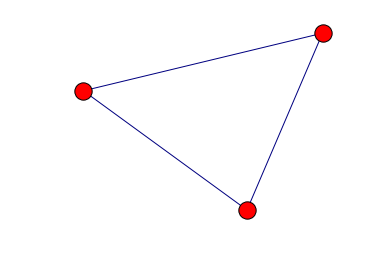

In [15]:
cg.plot()

## Feature Extraction

In [16]:
# Apply SIFT to extract features
cg.extract_features(method='sift', extractor_parameters={'nfeatures': 1000})

The graph method *extract_features* uses OpenCV in the background to calcluate features for every node in the graph using the detector methods [SIFT](http://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html#gsc.tab=0 "OpenCV Sift Docs"), [SURF](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html "OpenCV Surf Docs"), [ORB](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_orb/py_orb.html "OpenCV") or [FAST](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_fast/py_fast.html "OpenCV FAST docs"). Here, you can see we are using SIFT. Every node now contains a [pandas dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) containing keypoint information. Along with the dataframe, there is descriptor information and image metadata. 

We can see this be ploting a single node (i.e. a single image):

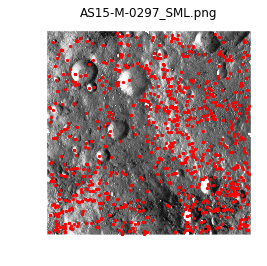

In [17]:
cg.node[0].plot()

We can see more by printing node data and the first few keypoints from the pandas dataframe: 

In [18]:
print(cg.node[0])

print("\n\n", cg.node[0].keypoints[:5])


        NodeID: None
        Image Name: AS15-M-0297_SML.png
        Image PATH: /scratch/autocnet/autocnet/examples/Apollo15/AS15-M-0297_SML.png
        Number Keypoints: 1000
        Available Masks : Empty DataFrame
Columns: []
Index: []
        


             x           y  response      size       angle  octave  layer
0  157.413879  260.973541  0.044588  4.724759   50.747131       0      2
1  157.413879  260.973541  0.044588  4.724759  139.293961       0      2
2   95.935020  243.419006  0.074220  5.226621  357.451599       0      2
3    7.919065  219.848343  0.065819  5.648592  352.335785       0      2
4  358.135040  194.310928  0.047823  5.527893  163.209961       0      2


##  Feature Matching

[2, 1, 0]
[0, 1, 2]


# The Config File<a name="config"></a>